In [1]:
import numpy as np
import pandas as pd
import scipy.stats as spt
import seaborn as sb
import matplotlib.pyplot as plt

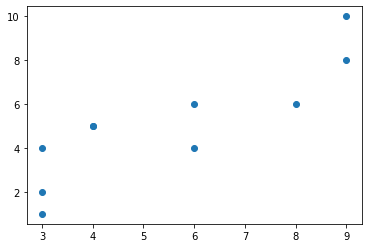

5.61111111111111


In [2]:
x = [8, 3, 6, 6, 9, 4, 3, 9, 3, 4]
y = [6, 2, 4, 6, 10, 5, 1, 8, 4, 5]
plt.plot(x, y, 'o')
plt.show()
np.cov(x, y)
print(np.cov(x, y)[0,1])

In [3]:
np.corrcoef(x, y)
print(np.corrcoef(x, y)[0,1])

0.8625172792135779


In [4]:
spt.spearmanr(x, y).correlation

0.9000703207408192

In [5]:
spt.kendalltau(x, y).correlation

0.8153742483272113

In [6]:
spt.pearsonr(x, y)

(0.862517279213578, 0.0013196539142000013)

In [7]:
data1=pd.read_csv('score3.csv')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   score   19 non-null     int64
 1   sp      19 non-null     int64
 2   ef      19 non-null     int64
dtypes: int64(3)
memory usage: 584.0 bytes


/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


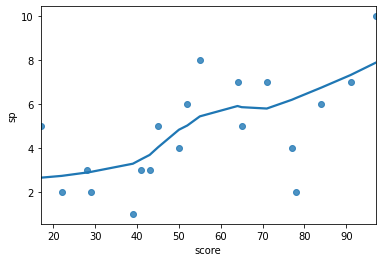

In [8]:
sb.regplot('score','sp',lowess=True,data=data1)

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


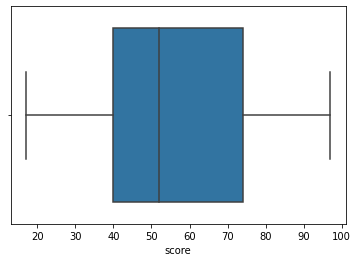

In [9]:
sb.boxplot('score', data=data1, orient='v')
plt.show()

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


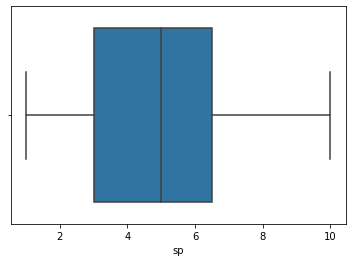

In [10]:
sb.boxplot('sp', data=data1, orient='v')
plt.show()

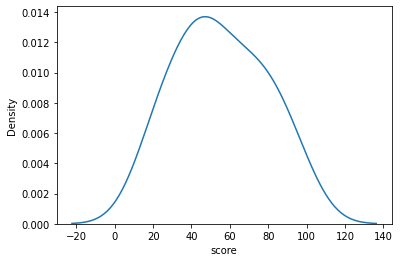

In [11]:
sb.kdeplot(data1['score'])
plt.show()

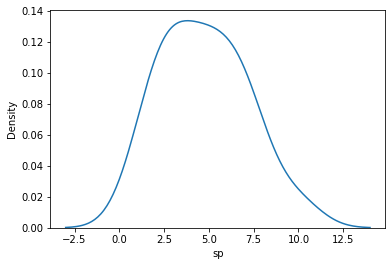

In [12]:
sb.kdeplot(data1['sp'])
plt.show()

In [13]:
print(spt.skew(data1['score']),'\n')
print(spt.skew(data1['sp']))

0.13579145234689638 

0.3682845554195091


In [14]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import vif

reg1 = ols('score ~ sp', data=data1).fit()

reg1.summary()

ImportError: cannot import name 'vif' from 'statsmodels.stats.outliers_influence' (/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py)

In [ ]:
reg2 = ols('score ~ 0+sp', data=data1).fit()
reg2.summary()

In [15]:
mdl = ols('score ~ sp + ef',data=data1)
reg3 = mdl.fit()
reg3.summary()

/Applications/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     7.742
Date:                Thu, 06 Jan 2022   Prob (F-statistic):            0.00445
Time:                        20:24:41   Log-Likelihood:                -80.073
No. Observations:                  19   AIC:                             166.1
Df Residuals:                      16   BIC:                             169.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.6444     18.539     -0.251      0.805     -43.945      34.656
sp             6.9505      1.821      3.817      0.002       3.091      10.810
ef             5.7382      2.928      1.960      0.068      -0.468      11.945
==============================================================================
Omnibus:                        1.842   Durbin-Watson:                   1.572
Prob(Omnibus):                  0.398   Jarque-Bera (JB):                0.729
Skew:                          -0.460   Prob(JB):                        0.694
Kurtosis:                       3.275   Cond. No.                         31.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print(mdl.exog_names,'\n')

print(vif(mdl.exog, 1),'\n')
print(vif(mdl.exog, 2),'\n')

In [ ]:
pd.DataFrame({'col': column, 'VIF': vif(mdl.exog, i)} 
             for i, column in enumerate(mdl.exog_names)
             if column != 'Intercept')

In [ ]:
ftd = reg1.predict(data1)
res = data1['score'] - ftd

sb.regplot(ftd, res, lowess=True, line_kws={'color': 'green'})
plt.plot([ftd.min(), ftd.max()], [0, 0], '--', color='black')
plt.show()

In [ ]:
sr = spt.zscore(res)
(x,y),_ = spt.probplot(sr)

sb.scatterplot(x,y)
plt.plot([-2, 2], [-2, 2], '--', color='black')
plt.show()

print(spt.shapiro(res))

In [ ]:
sb.regplot(ftd, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})
plt.show()